# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample


# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [ ]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

In [ ]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

In [ ]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
# Aggregate data by year
df_yearly = df.groupby('Year').agg({
    'Global Average Temperature (°C)': 'mean',
    'CO2 Concentration (ppm)': 'mean',
    'Sea Level Rise (mm)': 'mean',
    'Arctic Ice Area (million km²)': 'mean'
}).reset_index()

# Print the aggregated data
print(df_yearly.head())  # Display the first few rows of the aggregated data



## 2. Univariate Analysis

Analyze each climate variable independently.

In [ ]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here

# Descriptive statistics
# Perform univariate analysis for each climate variable
climate_vars = [
    'Global Average Temperature (°C)',
    'CO2 Concentration (ppm)',
    'Sea Level Rise (mm)',
    'Arctic Ice Area (million km²)'
]

# Iterate over each climate variable
for var in climate_vars:
    print(f"\nDescriptive statistics for {var}:")
    # Descriptive statistics
    print(df[var].describe())
    
    # Visualizations
    
    # Set up the figure
    plt.figure(figsize=(12, 6))
    
    # Plotting Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[var], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{var} - Histogram')
    
    # Plotting Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[var], color='lightgreen')
    plt.title(f'{var} - Boxplot')
    
    # Plotting KDE (Kernel Density Estimate)
    plt.subplot(1, 3, 3)
    sns.kdeplot(df[var], fill=True, color='orange')
    plt.title(f'{var} - KDE Plot')
    
    # Display the plots
    plt.tight_layout()
    plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

In [ ]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here


# Define the climate variables
climate_vars = ['Global Average Temperature (°C)', 'CO2 Concentration (ppm)',
                'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)']

# 1. Correlation analysis between the climate variables
correlation_matrix = df[climate_vars].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# 2. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Climate Variables')
plt.show()

# 3. Bivariate visualizations - Scatter plots and line plots
for i in range(len(climate_vars)):
    for j in range(i + 1, len(climate_vars)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=climate_vars[i], y=climate_vars[j])
        plt.title(f'Scatter Plot: {climate_vars[i]} vs {climate_vars[j]}')
        plt.xlabel(climate_vars[i])
        plt.ylabel(climate_vars[j])
        plt.show()

        # Optionally, you can also add a regression line to the scatter plot
        sns.lmplot(data=df, x=climate_vars[i], y=climate_vars[j])
        plt.title(f'Regression Line: {climate_vars[i]} vs {climate_vars[j]}')
        plt.xlabel(climate_vars[i])
        plt.ylabel(climate_vars[j])
        plt.show()

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

In [ ]:
# # Define the climate variables
# climate_vars = ['Global Average Temperature (°C)', 'CO2 Concentration (ppm)',
#                 'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)']

# # Optionally, take a small random sample of the data to speed up visualization for smaller datasets
# df_sampled = resample(df, n_samples=1000, random_state=42)  # Adjust n_samples as needed

# # 1. Pairplot for multivariate visualization (showing pairwise relationships)
# sns.pairplot(df_sampled[climate_vars])
# plt.suptitle('Pairplot of Climate Variables', y=1.02)
# plt.show()

# # 2. 3D Scatter plot for a visualization of three variables at once
# fig = plt.figure(figsize=(8, 6))  # Adjust size to reduce load
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df_sampled['Global Average Temperature (°C)'], df_sampled['CO2 Concentration (ppm)'],
#            df_sampled['Sea Level Rise (mm)'], c='r', marker='o')

# ax.set_xlabel('Global Average Temperature (°C)')
# ax.set_ylabel('CO2 Concentration (ppm)')
# ax.set_zlabel('Sea Level Rise (mm)')
# plt.title('3D Scatter Plot: Global Temperature, CO2, and Sea Level Rise')
# plt.show()

# # 3. Facet Grid to visualize data based on all available years
# if 'Year' in df.columns:
#     # Use the entire dataset, as we want to include all years
#     df_sampled_year = df_sampled  # No filtering by year

#     # Check if the filtered dataframe is empty before proceeding
#     if not df_sampled_year.empty:
#         g = sns.FacetGrid(df_sampled_year, col='Year', col_wrap=4, height=4)
#         g.map(sns.scatterplot, 'Global Average Temperature (°C)', 'CO2 Concentration (ppm)')
#         g.set_axis_labels('Global Average Temperature (°C)', 'CO2 Concentration (ppm)')
#         plt.subplots_adjust(top=0.9)
#         g.fig.suptitle('Year-wise Scatter Plot of Temperature vs CO2')
#         plt.show()
#     else:
#         print("No data available for the selected 'Year' range.")
# else:
#     print("No 'Year' column found for FacetGrid visualization.")


Available Years in the Data: [1959 1923 1982 1979 2002 2013 1969 1991 2003 1951 1956 1961 1962 1974
 1976 1947 1939 1919 2005 1946 1990 1933 1924 1968 2015 2009 1975 1980
 1935 1940 2000 1945 1971 1997 1949 2007 1953 1998 1986 1907 1941 1932
 1909 1995 1913 1999 1903 1994 1973 1963 1918 1914 1966 2008 1992 1902
 1954 2010 1996 1900 1911 1917 1916 2004 1984 1910 1978 1901 1993 2022
 1920 1905 1987 1931 1937 2011 1938 2001 1927 1925 1989 1960 2018 1970
 1926 1942 1908 2006 1930 2019 1967 2023 2016 1957 2020 1955 1943 1906
 1952 2012 1944 1958 1965 1929 1912 1950 1981 1972 1983 1921 2021 1977
 1936 1948 1928 1934 1915 1964 1904 1988 2014 2017 1922 1985]


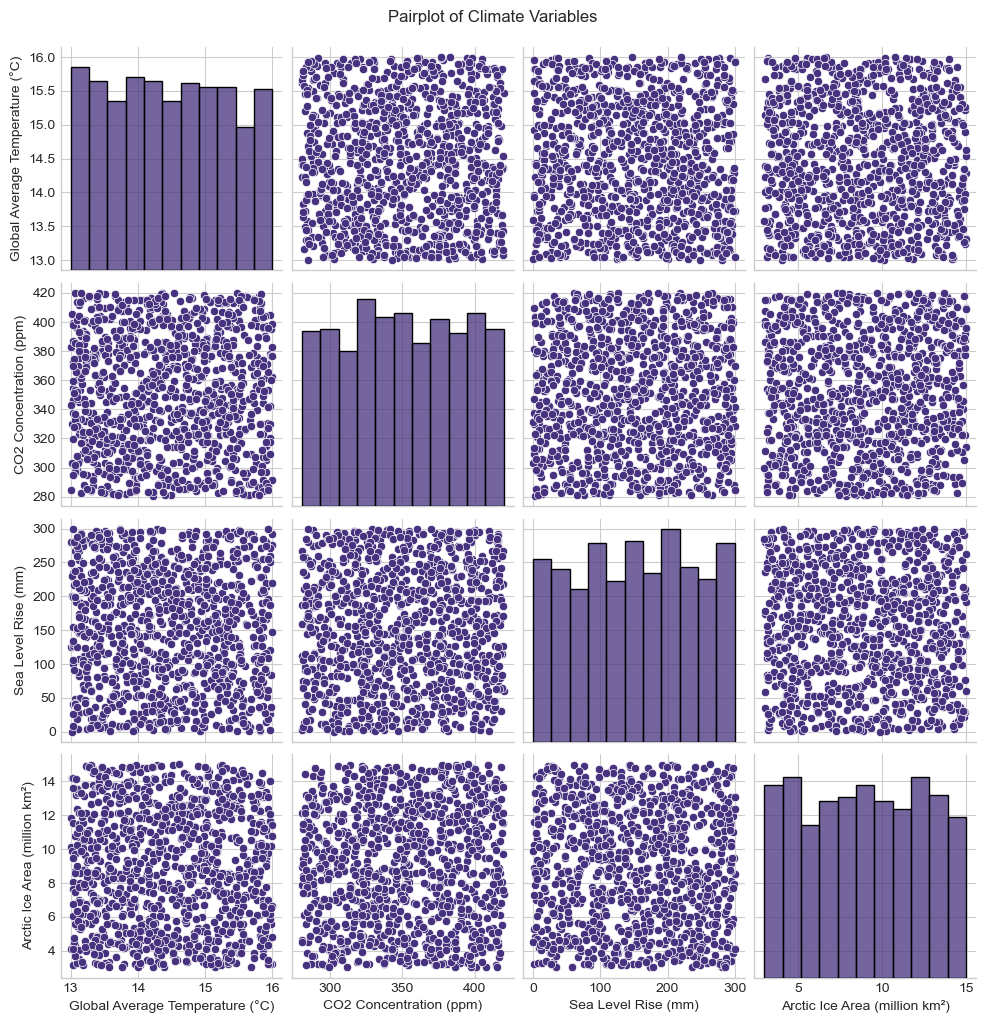

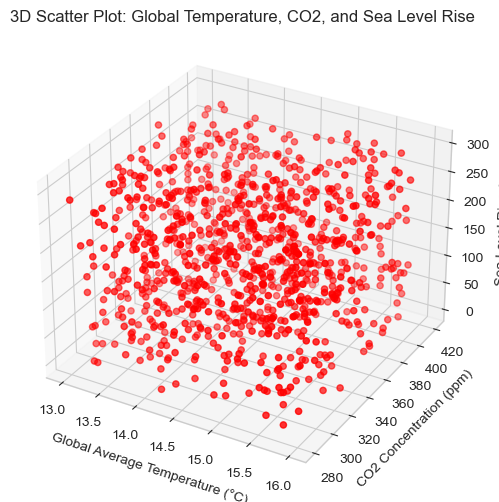

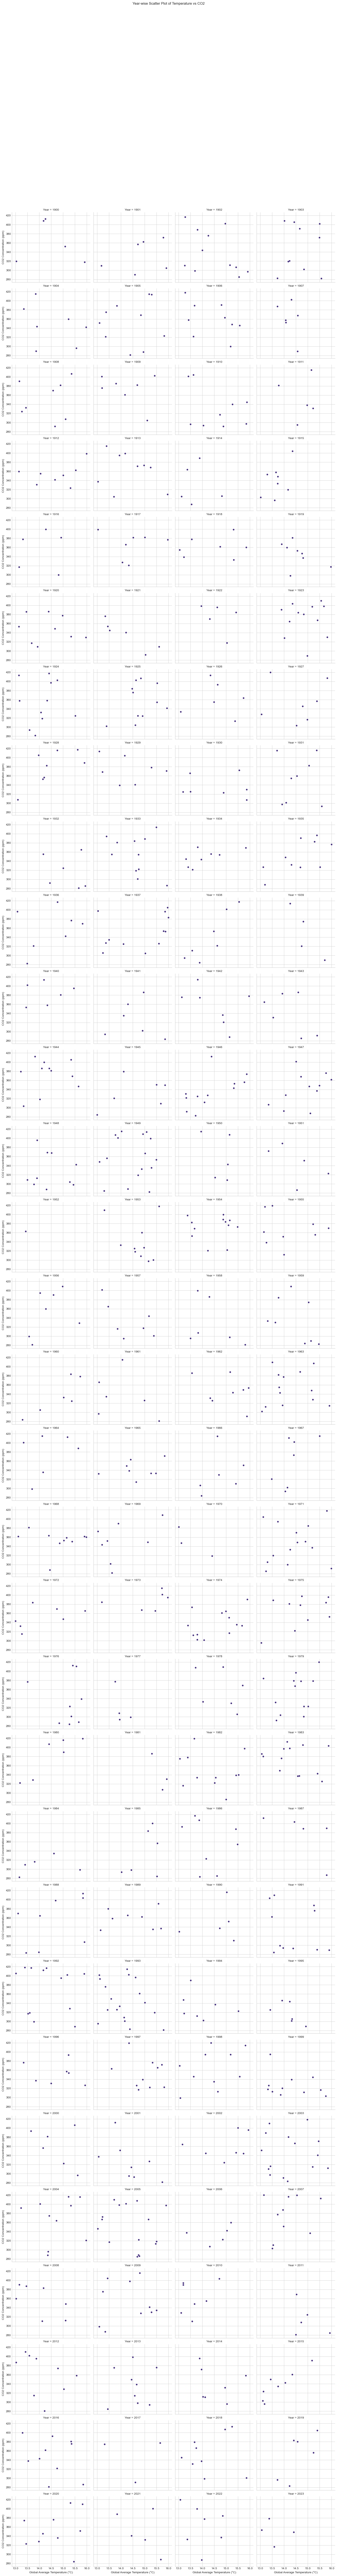

In [19]:
# Define the climate variables
climate_vars = ['Global Average Temperature (°C)', 'CO2 Concentration (ppm)',
                'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)']

# Optionally, take a small random sample of the data to speed up visualization for smaller datasets
df_sampled = resample(df, n_samples=1000, random_state=42)  # Adjust n_samples as needed

# Check available years in the dataset
available_years = df_sampled['Year'].unique()
print(f"Available Years in the Data: {available_years}")

# 1. Pairplot for multivariate visualization (showing pairwise relationships)
sns.pairplot(df_sampled[climate_vars])
plt.suptitle('Pairplot of Climate Variables', y=1.02)
plt.show()

# 2. 3D Scatter plot for a visualization of three variables at once
fig = plt.figure(figsize=(8, 6))  # Adjust size to reduce load
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_sampled['Global Average Temperature (°C)'], df_sampled['CO2 Concentration (ppm)'],
           df_sampled['Sea Level Rise (mm)'], c='r', marker='o')

ax.set_xlabel('Global Average Temperature (°C)')
ax.set_ylabel('CO2 Concentration (ppm)')
ax.set_zlabel('Sea Level Rise (mm)')
plt.title('3D Scatter Plot: Global Temperature, CO2, and Sea Level Rise')
plt.show()

# 3. Facet Grid to visualize data based on available years
if 'Year' in df.columns:
    # Filter for only available years in the smaller dataset
    # You can specify the years you want to test with, or dynamically use available years
    selected_years = available_years  # or specify a subset like ['2000', '2010', '2020']
    
    df_sampled_year = df_sampled[df_sampled['Year'].isin(selected_years)]

    # Check if the filtered dataframe is empty before proceeding
    if not df_sampled_year.empty:
        g = sns.FacetGrid(df_sampled_year, col='Year', col_wrap=4, height=4)
        g.map(sns.scatterplot, 'Global Average Temperature (°C)', 'CO2 Concentration (ppm)')
        g.set_axis_labels('Global Average Temperature (°C)', 'CO2 Concentration (ppm)')
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle('Year-wise Scatter Plot of Temperature vs CO2')
        plt.show()
    else:
        print("No data available for the selected 'Year' range.")
else:
    print("No 'Year' column found for FacetGrid visualization.")


## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here